# Case Study: Cycle Sharing Scheme—Determining Brand Persona
This notebook performs exploratory data analysis on the Seattle Cycle Share dataset to understand customer behavior, identify personas, and uncover insights that can aid decision-making for marketing and operations.

- Problem: A cycle-sharing scheme in Seattle has expanded rapidly, but customer retention is low.

- Goal: Understand customer behavior/personas using trip data to target marketing efforts effectively.

In [3]:
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy

## Performing Exploratory Data Analysis
### Feature Exploration

- #### Listing 1-2. Reading the Data into Memory

In [4]:
# Load dataset
data = pd.read_csv("./datasets/trip.csv")

- #### Listing 1-3. Printing Size of the Dataset and Printing First Few Rows

In [5]:
print (len(data))
# View first few rows
data.sample(10)

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
151159,165520,11/10/2015 4:48,11/10/2015 4:55,SEA00058,458.242,REI / Yale Ave N & John St,6th Ave & Blanchard St,SLU-01,BT-04,Member,Female,1988.0
115972,128311,8/13/2015 18:42,8/13/2015 18:53,SEA00174,694.571,King Street Station Plaza / 2nd Ave Extension ...,Seattle Aquarium / Alaskan Way S & Elliott Bay...,PS-05,WF-04,Short-Term Pass Holder,NaN,NaN
13810,17173,11/26/2014 9:00,11/26/2014 9:21,SEA00356,1305.090,REI / Yale Ave N & John St,Lake Union Park / Valley St & Boren Ave N,SLU-01,SLU-17,Short-Term Pass Holder,NaN,NaN
81657,91773,6/16/2015 12:27,6/16/2015 12:50,SEA00459,1376.793,2nd Ave & Vine St,Fred Hutchinson Cancer Research Center / Fairv...,BT-03,EL-01,Short-Term Pass Holder,NaN,NaN
206735,224573,6/23/2016 14:04,6/23/2016 14:17,SEA00377,792.966,E Harrison St & Broadway Ave E,1st Ave & Marion St,CH-02,CBD-05,Member,Male,1996.0
35847,43040,3/4/2015 9:32,3/4/2015 9:36,SEA00376,276.617,Westlake Ave & 6th Ave,Republican St & Westlake Ave N,SLU-15,SLU-04,Member,Female,1966.0
208831,226824,6/29/2016 11:57,6/29/2016 11:59,SEA00112,135.102,12th Ave & NE Campus Pkwy,15th Ave NE & NE 40th St,UD-04,UW-04,Member,Male,1991.0
182812,199081,4/14/2016 19:22,4/14/2016 19:28,SEA00084,346.274,9th Ave N & Mercer St,Westlake Ave & 6th Ave,DPD-01,SLU-15,Member,Male,1986.0
60645,69444,5/7/2015 13:44,5/7/2015 17:40,SEA00401,14163.901,6th Ave S & S King St,3rd Ave & Broad St,ID-04,BT-01,Short-Term Pass Holder,NaN,NaN
199362,216845,6/4/2016 13:30,6/4/2016 16:23,SEA00330,10368.492,Lake Union Park / Valley St & Boren Ave N,Westlake Ave & 6th Ave,SLU-17,SLU-15,Short-Term Pass Holder,NaN,NaN


#### Data Summary and Structure

#### Variable Classification

- Discrete: `trip_id`
- Continuous (Interval/Ratio): `tripduration`,`birthyear` 
- Categorical (Nominal/Ordinal): `gender`, `usertype`

- Datetime: timestamps `Starttime`,`Stoptime`

Special Types:

- Nominal: `from_station_name `
- Nominal (categorical):`usertype`
- Dichotomous:`gender`

  Independent/Dependent:
- Dependent: `tripduration`
- Independent: `gender`, `usertype`, etc.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236065 entries, 0 to 236064
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            236065 non-null  int64  
 1   starttime          236065 non-null  object 
 2   stoptime           236065 non-null  object 
 3   bikeid             236065 non-null  object 
 4   tripduration       236065 non-null  float64
 5   from_station_name  236065 non-null  object 
 6   to_station_name    236065 non-null  object 
 7   from_station_id    236065 non-null  object 
 8   to_station_id      236065 non-null  object 
 9   usertype           236065 non-null  object 
 10  gender             146171 non-null  object 
 11  birthyear          146167 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 21.6+ MB


In [7]:
print(data.isnull().sum())

trip_id                  0
starttime                0
stoptime                 0
bikeid                   0
tripduration             0
from_station_name        0
to_station_name          0
from_station_id          0
to_station_id            0
usertype                 0
gender               89894
birthyear            89898
dtype: int64


In [8]:
data.describe()

,trip_id,tripduration,birthyear
count,236065.000000,236065.00000,146167.000000
mean,130059.869333,1202.61221,1979.879740
std,72842.289278,2066.42488,10.154978
min,431.000000,60.00800,1931.000000
25%,67746.000000,392.26500,1975.000000
50%,130526.000000,633.23500,1983.000000
75%,192900.000000,1145.01500,1987.000000
max,255245.000000,28794.39800,1999.000000


#### Listing 1-4. Determining the Time Range of the Dataset

In [9]:
# Convert starttime and stoptime to datetime objects
data['starttime'] = pd.to_datetime(data['starttime'], format='%m/%d/%Y %H:%M')
data['stoptime'] = pd.to_datetime(data['stoptime'], format='%m/%d/%Y %H:%M')

data = data.sort_values(by='starttime', ignore_index=True)
data.head(1)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0


In [10]:
# Determine the date range
# start_date = data['starttime'].min()
# end_date = data['stoptime'].max()
# print(f" Date range of dataset from {start_date} to {end_date}")

print ('Date range of dataset: %s - %s'%(data['starttime'].loc[0],data['stoptime'].iloc[len(data)-1]))

Date range of dataset: 2014-10-13 10:31:00 - 2016-09-01 00:20:00


##### Two insights
- The dataset spans from **October 13, 2014** to **September 1, 2016**, covering almost two years of trip data. This range is sufficient for analyzing seasonal, monthly, and yearly trends in user behavior.
- Cycle sharing service is usually operational beyond the standard 9 to 5 business hours.

#### Listing 1-5. Plotting the Distribution of User Types

Visualize the number of trips by user type:
- Members vs Short-Term Pass Holders

In [11]:
import seaborn as sns

<Axes: title={'center': 'Distribution of user types'}, xlabel='usertype'>

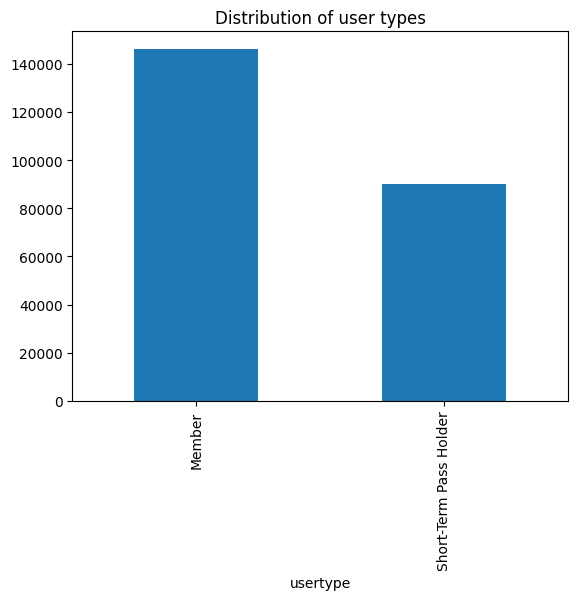

In [12]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')
# plt.bar(groupby_user, color='violet')
# plt.title('Distribution of user types')
# plt.show()

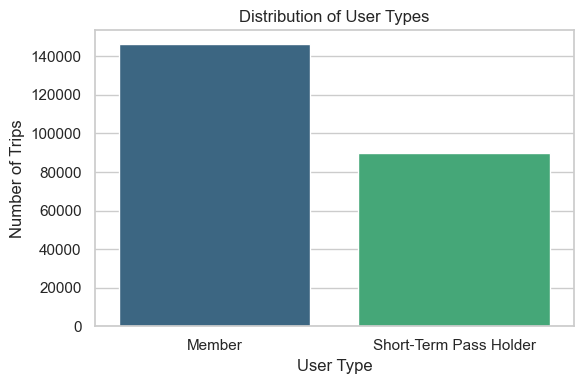

In [13]:
sns.set(style="whitegrid")

# Count number of trips by user type
user_counts = data['usertype'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=user_counts.index, y=user_counts.values, palette="viridis",hue=user_counts.index)

# Add labels and title
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')

# Show plot
plt.tight_layout()
plt.show()

#### User Type Distribution

The bar chart reveals that **Members** use the cycle sharing service significantly more than **Short-Term Pass Holders**. This suggests that members are more engaged and possibly more loyal to the service.

This insight can inform strategies such as targeting promotional offers to convert short-term users into members.


#### Listing 1-6. Plotting the Distribution of Gender
Visualize how the usage of the cycle sharing service is distributed by gender.

gender
Female     30330
Male      112940
Other       2901
dtype: int64


<Axes: title={'center': 'Distribution of genders'}, xlabel='gender'>

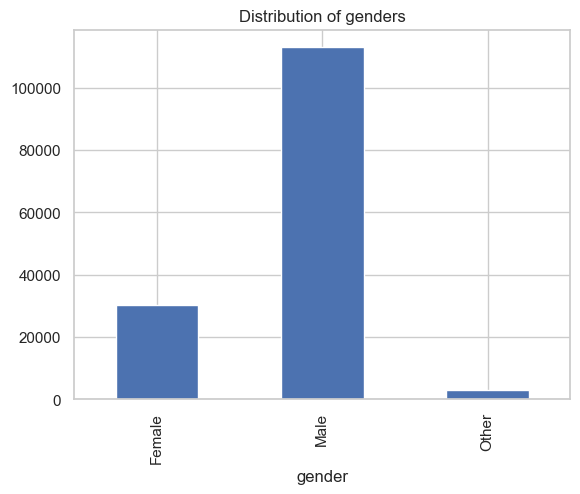

In [14]:
groupby_gender_size = data.groupby('gender').size()
print(groupby_gender_size)
groupby_gender_size.plot.bar(title = 'Distribution of genders')

/var/folders/97/ldk24swd38n_sc034kw8dsm00000gn/T/ipykernel_50572/2910388879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")


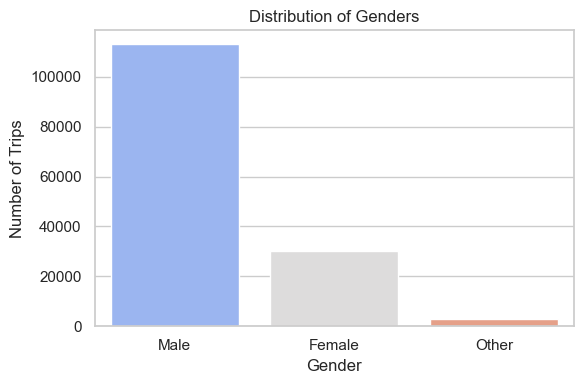

In [15]:
#Python 3 Code (Seaborn + Matplotlib)
gender_counts = data['gender'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")

# Add labels and title
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')

# Display
plt.tight_layout()
plt.show()

#### Gender Distribution

The gender distribution shows a **significant male dominance** in trip usage. This aligns with trends seen in similar services globally (e.g., UK's bike share programs). 

The company may consider investigating the barriers to entry for female users and promoting campaigns aimed at improving gender balance.

#### Listing 1-7 – Plotting the Distribution of Birth Years

Goal:
Visualize the distribution of birth years to identify which age groups use the service the most.

Why?

Helps identify the dominant age demographic (e.g., Millennials, Gen Z).

Informs branding and marketing strategies to better appeal to the core user base.

Correlates with membership status and ride frequency.

<Axes: title={'center': 'Distribution of birth years'}, xlabel='birthyear'>

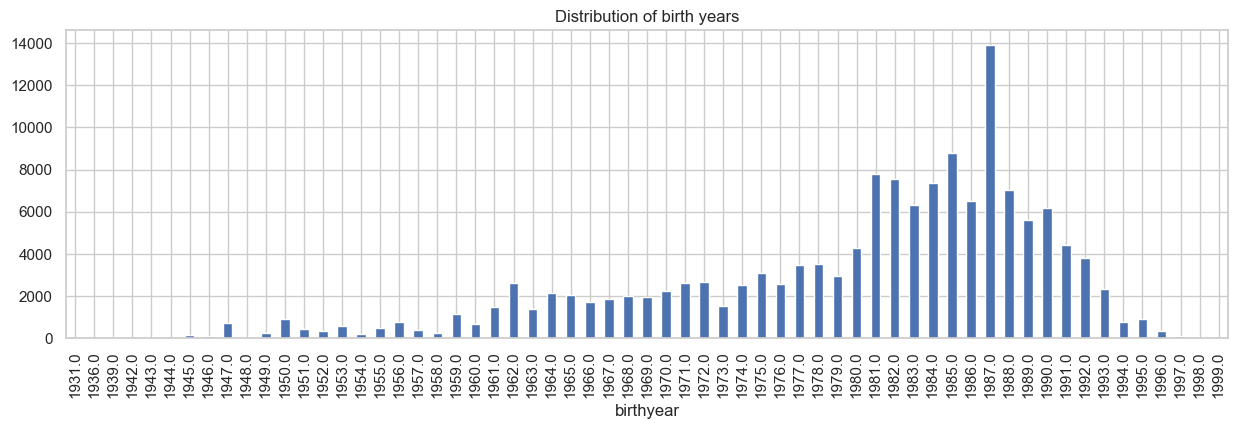

In [16]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years',
figsize = (15,4))

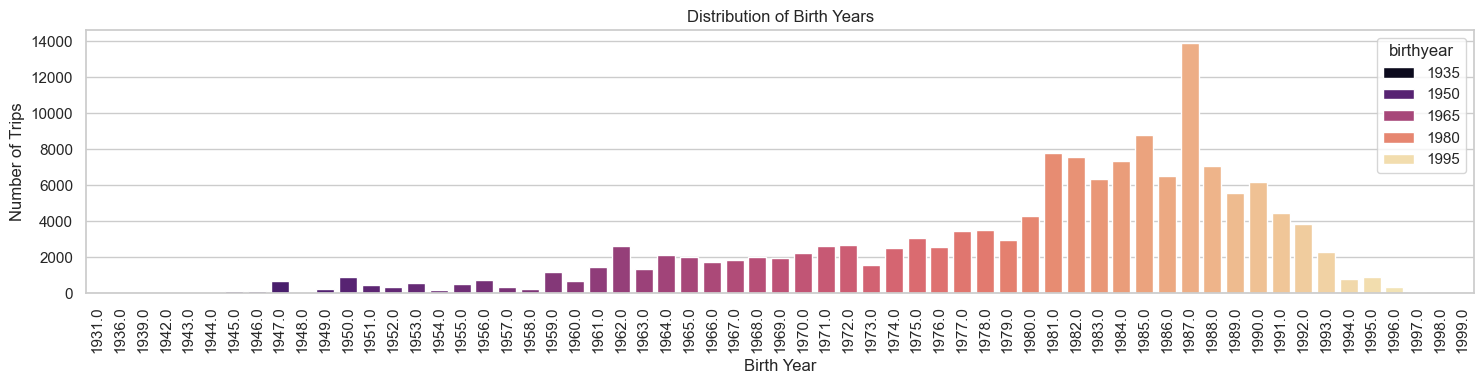

In [17]:
#######Python 3 Code#####
# Drop missing birthyear values first (for plotting)
birthyear_counts = data['birthyear'].dropna().value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 4))
sns.barplot(x=birthyear_counts.index, y=birthyear_counts.values, palette="magma",hue=birthyear_counts.index )

# Add labels and title
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


Insight:

- A peak around 1980–1990 = Millennials.

- 1987 being the highest peak

- These users are often more tech-savvy and open to new transportation options.

The birth year distribution indicates that **Millennials (born ~1980–1995)** form the largest user group. This aligns with demographic studies showing Millennials are the most likely to adopt eco-friendly and tech-enabled commuting options.

This insight suggests that marketing should continue to target this age group, while exploring how to engage older or younger users as secondary markets.



#### Listing 1-8 – Plotting the Frequency of Member Types for Millennials

Goal

Analyze how Millennials (users born between ~1977 and 1994) are distributed between:

- Members

- Short-Term Pass Holders

Why?
- To validate whether Millennials are more likely to become members.
- Helps confirm if the most active age group is also the most loyal.

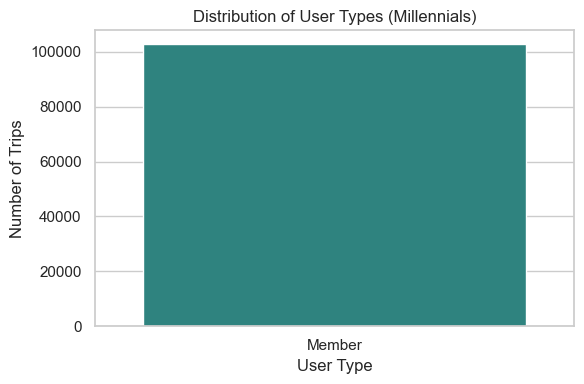

In [18]:
millennials = data[(data['birthyear'] >= 1977) & (data['birthyear'] <= 1994)]
millennial_usertypes = millennials['usertype'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=millennial_usertypes.index, y=millennial_usertypes.values, palette="viridis", hue=millennial_usertypes.index)

# Labels and title
plt.title("Distribution of User Types (Millennials)")
plt.xlabel("User Type")
plt.ylabel("Number of Trips")

plt.tight_layout()
plt.show()

Conclusion

The data confirms that **Millennials are predominantly Members** rather than short-term users. This suggests high engagement and loyalty within this age group, reinforcing the idea that Millennials are a core customer segment.

Promotional strategies could focus on **referral programs** or **loyalty incentives** to further solidify this segment and encourage other demographics to follow suit.


### Multivariate Analysis
- Combining features like birthyear + gender, or birthyear + usertype
- Used stacked bar graphs for gender vs. birthyear

#### Listing 1-9 – Plotting the Distribution of Birth Years by Gender

Goal

Create a stacked bar chart to show how gender distribution varies by birth year.

Why?
- To analyze whether certain age groups are more male- or female-dominated.
- Identify any gender patterns across generations.
- Useful for tailoring gender-targeted campaigns.

In [19]:
# Filter out missing birth years and genders
filtered = data.dropna(subset=['birthyear', 'gender'])

# Group by birth year and gender
birth_gender_group = (
    filtered.groupby(['birthyear', 'gender'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

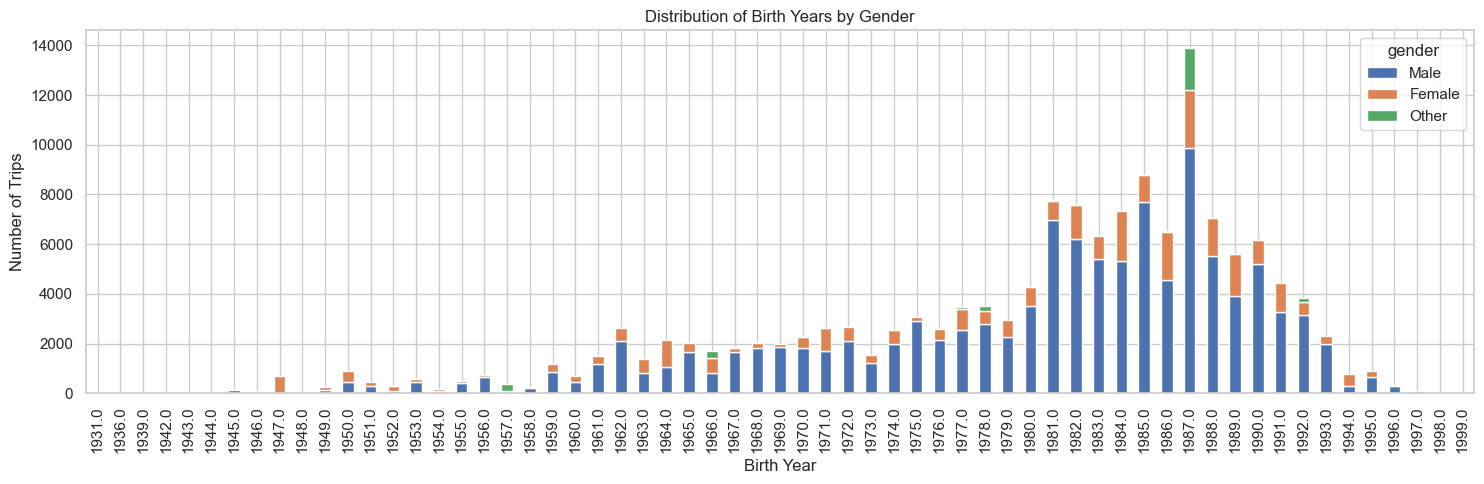

In [20]:
# Plot stacked bar chart
birth_gender_group[['Male','Female','Other']].plot(
    kind='bar',
    stacked=True,
    figsize=(15, 5),
    title='Distribution of Birth Years by Gender'
)

# Labeling
plt.xlabel('Birth Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Distribution of birth years by Gender'}, xlabel='birthyear'>

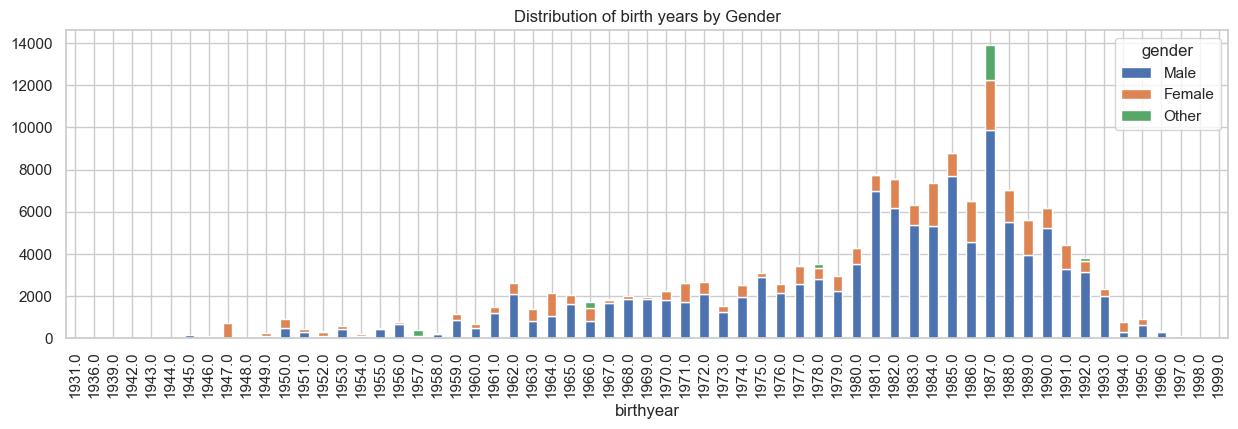

In [21]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title =
'Distribution of birth years by Gender', stacked=True, figsize = (15,4))

#### Birth Year vs Gender Insight:

The stacked bar chart shows that the majority of users are male across most birth years.  However, subscribers born in 1947 were all females. Moreover, those born in 1964 and 1994 were dominated by females as well. This highlights an opportunity to explore what factors encourage female participation and how to replicate that success across other age groups.

#### Listing 1-10 – Plotting the Distribution of Birth Years by User Type

🧪 Goal

Visualize how user types (Members vs Short-Term Pass Holders) vary across different birth years.

🧠 Why?
- To examine how age influences the type of user someone becomes.
- To confirm whether older or younger users are more likely to be members or short-term pass holders.



/var/folders/97/ldk24swd38n_sc034kw8dsm00000gn/T/ipykernel_50572/4158973140.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=birth_usertype_group.index.astype(int),


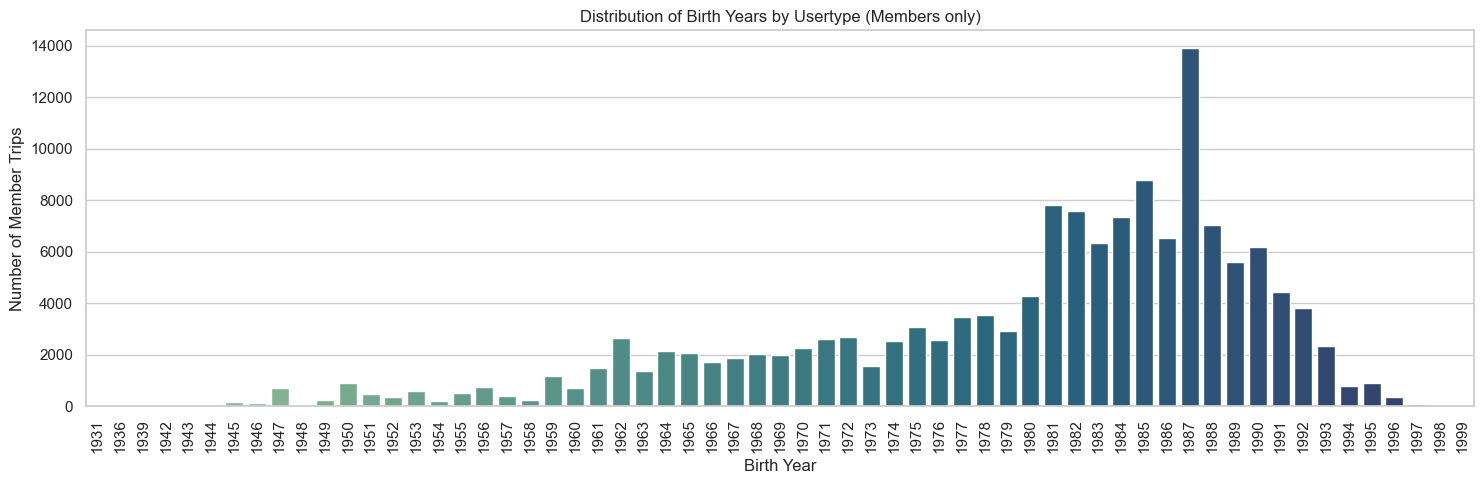

In [22]:
# Drop missing birth years and group by birthyear and usertype
filtered = data.dropna(subset=['birthyear'])
birth_usertype_group = (
    filtered.groupby(['birthyear', 'usertype'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Plot only 'Member' user type as in original listing
plt.figure(figsize=(15, 5))
sns.barplot(x=birth_usertype_group.index.astype(int),
            y=birth_usertype_group['Member'],
            palette="crest")

plt.title("Distribution of Birth Years by Usertype (Members only)")
plt.xlabel("Birth Year")
plt.ylabel("Number of Member Trips")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


⚠️ Important Observation

If Short-Term Pass Holders have missing birth years, they won’t appear in the plot (as mentioned in the book).

You can verify that:

#### Listing 1-11 – Validate Birth Year Availability for Short-Term Pass Holders
🧪 Goal:

Confirm that Short-Term Pass Holders have missing values (NaN) in the birthyear field.

In [23]:
# Check if all birth years are missing for short-term users
data[data['usertype'] == 'Short-Term Pass Holder']['birthyear'].isnull().all()


np.True_

**Insight:**

- You'll see trip activity for Members across birth years.
- Short-Term Pass Holders likely missing due to birthyear not required for short-term access.

This plot confirms that birth year information is **only available for Members**. Short-Term Pass Holders have null values for birth year, so we cannot analyze their age distribution.

This missing data limits our ability to compare age trends between user types. However, it reinforces the idea that Members (who provide demographic info) are a more consistent and analyzable group.



#### Listing 1-12 – Validate Gender Availability for Short-Term Pass Holders

Goal:

Check if the gender field is also missing (NaN) for Short-Term Pass Holders.

Why?
- Complements previous check on missing birth year.
- Helps confirm whether demographic data is generally not collected for short-term users.



In [24]:
all_missing_gender = data[data['usertype'] == 'Short-Term Pass Holder']['gender'].isna().all()

print(" Are all gender values missing for Short-Term Pass Holders?", all_missing_gender)

 Are all gender values missing for Short-Term Pass Holders? True


**Insight**
- This confirms that Short-Term Pass Holders lack both gender and birth year data.
- Likely because demographic info is not required for short-term access.

The result confirms that **gender information is also entirely missing** for Short-Term Pass Holders. This indicates that users opting for short-term access are not required to provide demographic data like gender or birth year.

As a result, detailed persona analysis and segmentation is only possible for **Members**, reinforcing their analytical and marketing value.


### Time series analysis

#### Listing 1-13 – Convert Start Time to Datetime and Extract Date Parts

Goal:

Convert the starttime column into proper datetime format and derive new features like:
- Date only
- Year
- Month
- Day
- Hour


  Why?

- Enables time series analysis
- Lets you analyze ride patterns across:
  -  Days
  -  Months
  -  Hours of the day (rush hours, late-night, etc.)

- These are critical for trend analysis and operational planning

In [25]:
  print(data['starttime'].dtype)

datetime64[ns]


In [26]:
# Derive new time-related features
data['starttime_date'] = data['starttime'].dt.date
data['starttime_year'] = data['starttime'].dt.year
data['starttime_month'] = data['starttime'].dt.month
data['starttime_day'] = data['starttime'].dt.day
data['starttime_hour'] = data['starttime'].dt.hour

In [27]:
data[['starttime', 'starttime_date', 'starttime_year', 'starttime_month', 'starttime_day', 'starttime_hour']].head()


,starttime,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour
212893,2016-07-08 16:22:00,2016-07-08,2016,7,8,16
117423,2015-08-16 17:21:00,2015-08-16,2015,8,16,17
116857,2015-08-15 18:07:00,2015-08-15,2015,8,15,18
116828,2015-08-15 17:27:00,2015-08-15,2015,8,15,17
179564,2016-04-03 19:02:00,2016-04-03,2016,4,3,19


##### Time-Based Feature Engineering

The `starttime` column was successfully converted to datetime format. From it, we derived new features: `year`, `month`, `day`, and `hour`. These features are critical for time-based trend analysis, seasonality detection, and operational planning (e.g., adjusting bike availability based on time of day).

#### Listing 1-14 – Plotting Average Trip Duration Per Day
Goal

Create a time series plot of the average trip duration per day using the starttime_date field.

Why?
- To observe trends or seasonality in trip duration over time.
- Detect patterns like peak usage periods, drops, or operational anomalies.
- Useful for capacity planning and seasonal marketing.



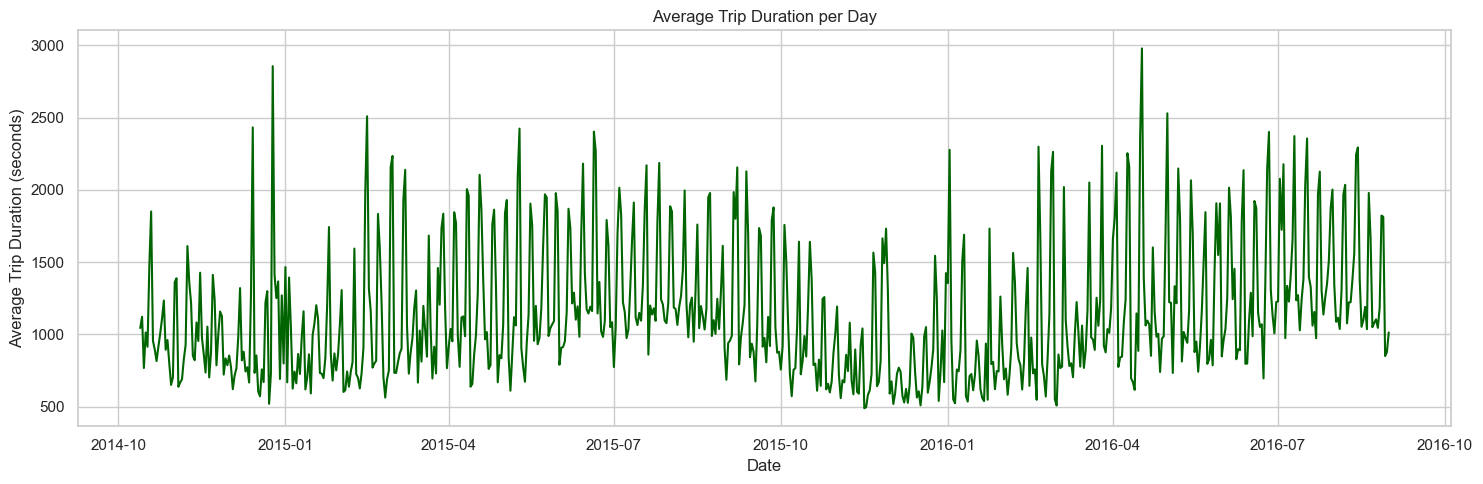

In [28]:
daily_avg_duration = data.groupby('starttime_date')['tripduration'].mean()

# Plot
plt.figure(figsize=(15, 5))
daily_avg_duration.plot(title='Average Trip Duration per Day', color='darkgreen')

# Labels
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

# data.groupby('starttime_date')['tripduration'].mean().plot.bar(title =
# 'Distribution of Trip duration by date', figsize = (15,4))

<Axes: title={'center': 'Average Trip Duration per Day (in minutes)'}, xlabel='starttime_date'>

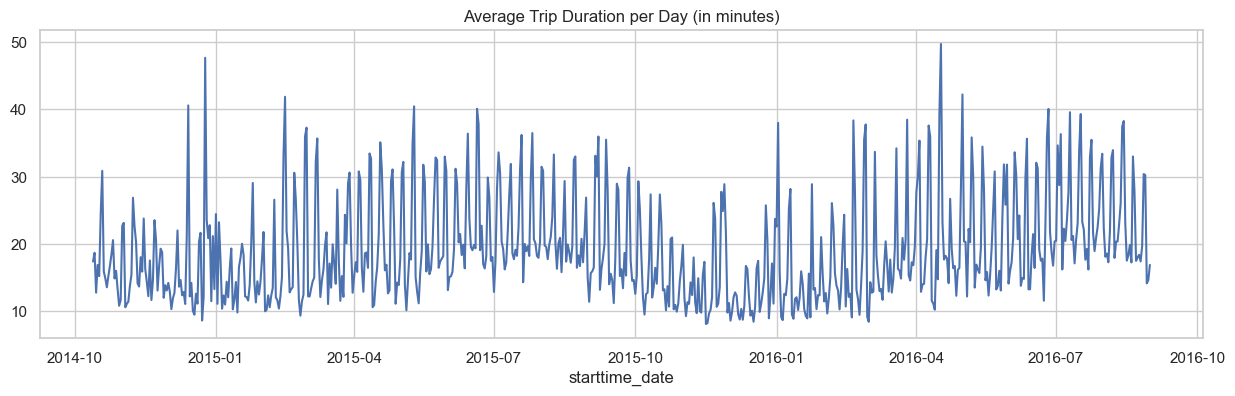

In [29]:
(daily_avg_duration / 60).plot(title='Average Trip Duration per Day (in minutes)' , figsize = (15,4))

### EXERCISES
1. determine the distribution of number of trips by year. do you see a specific pattern?

starttime_year
2014     20239
2015    140306
2016     75520
Name: count, dtype: int64


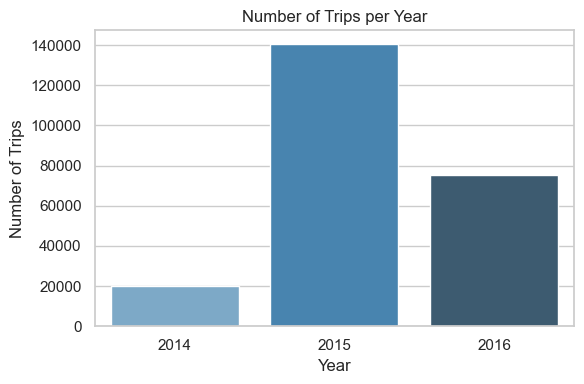

In [30]:
# Group and count trips by year
yearly_trips = data['starttime_year'].value_counts().sort_index()
print(yearly_trips)
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=yearly_trips.index.astype(str), y=yearly_trips.values, palette="Blues_d" ,hue= yearly_trips.index.astype(str))

plt.title("Number of Trips per Year")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

#### Trips by Year

The data shows a steady rise in trips from 2014 through 2016, peaking in 2015. This upward trend suggests **increased service adoption** or improved infrastructure/awareness over time.

2. determine the distribution of number of trips by month. do you see a specific pattern?

starttime_month
1     12530
2     13116
3     16953
4     21927
5     26035
6     27547
7     32150
8     30239
9     13134
10    17190
11    14364
12    10880
Name: count, dtype: int64


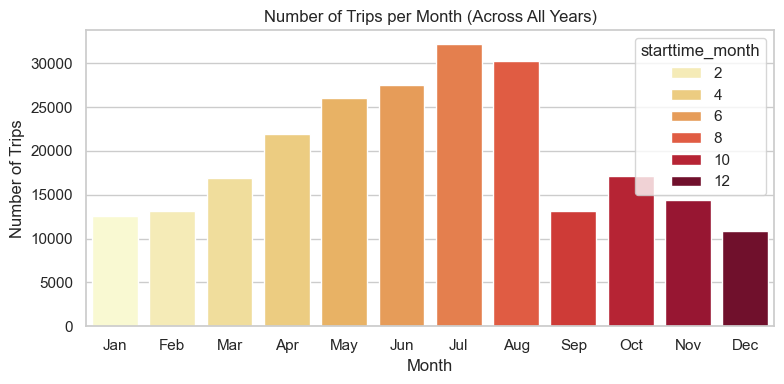

<class 'pandas.core.series.Series'>
Index: 236065 entries, 212893 to 236064
Series name: starttime_month
Non-Null Count   Dtype
--------------   -----
236065 non-null  int32
dtypes: int32(1)
memory usage: 2.7 MB


In [31]:
# Group and count by month (across all years)
monthly_trips = data['starttime_month'].value_counts().sort_index()
print(monthly_trips)
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_trips.index, y=monthly_trips.values, palette="YlOrRd", hue=monthly_trips.index)

plt.title("Number of Trips per Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.tight_layout()
plt.show()

data['starttime_month'].info()

#### Trips by Month

There is a clear **seasonal pattern**, with trips peaking during the **summer months** (June–August) and declining in the **winter**. This is typical for outdoor activities like cycling.

3. determine the distribution of number of trips by day. do you see a specific pattern?

/var/folders/97/ldk24swd38n_sc034kw8dsm00000gn/T/ipykernel_50572/3336691695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_trips.index, y=day_trips.values, palette="viridis")


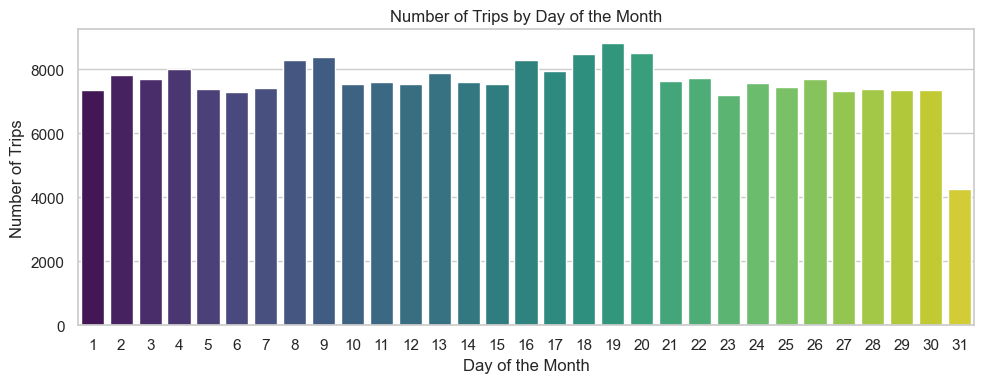

In [32]:
# Count by day of the month
day_trips = data['starttime_day'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=day_trips.index, y=day_trips.values, palette="viridis")

plt.title("Number of Trips by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

#### Trips by Day of the Month

Trips are generally **evenly distributed** across the days of the month. There are **no major patterns**, though slight dips may be due to month-end weekends or fewer days (28–30).


4. determine the distribution of number of trips by week. do you see a specific pattern?

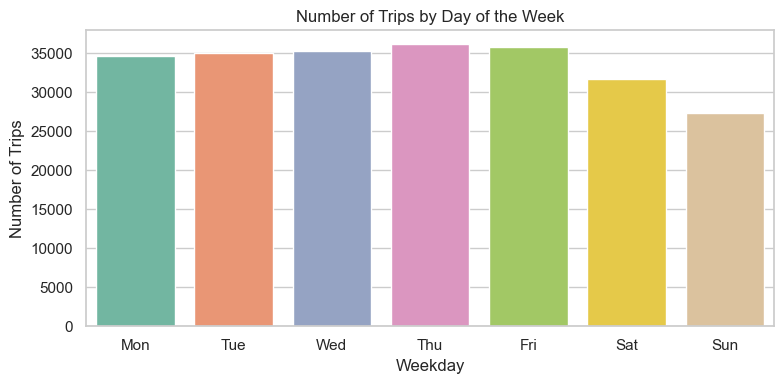

In [33]:
# Add day of week (0 = Monday, 6 = Sunday)
data['starttime_weekday'] = data['starttime'].dt.dayofweek
weekday_trips = data['starttime_weekday'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
            y=weekday_trips.values,
            palette="Set2" ,hue=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] )

plt.title("Number of Trips by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

#### Trips by Day of the Week

Usage is typically higher on **weekdays**, likely due to commuting. Slight dips on weekends indicate fewer work-related trips and possibly fewer commuters.


5. plot a frequency distribution of trips on a daily basis.

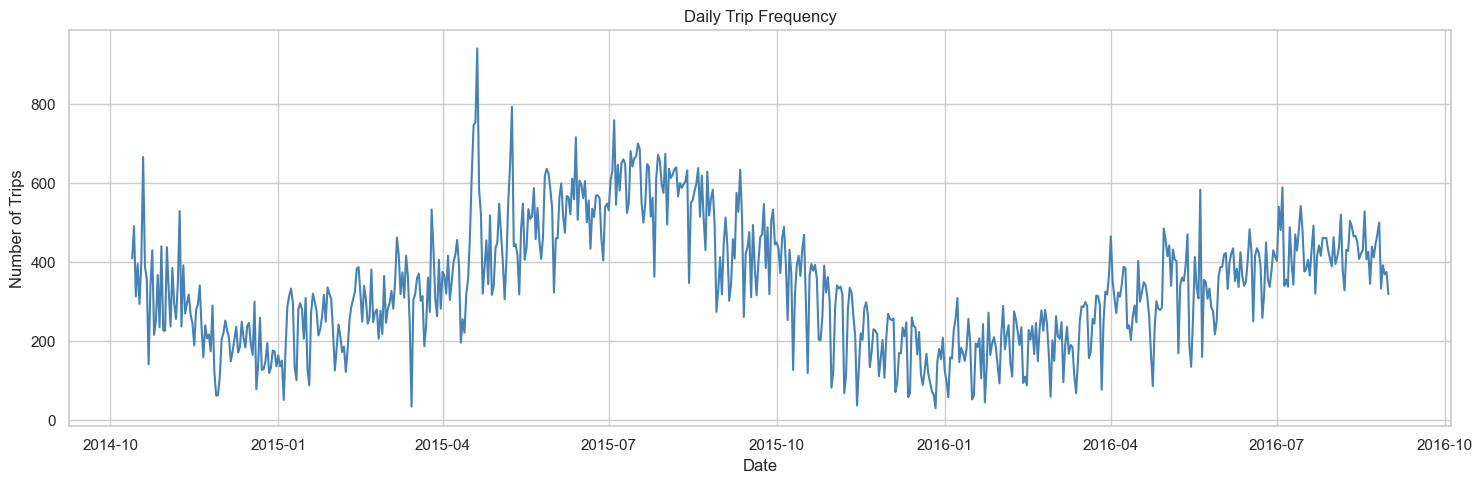

In [34]:
# Group by full date and count trips
daily_trip_counts = data['starttime_date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 5))
daily_trip_counts.plot(title="Daily Trip Frequency", color="steelblue")

plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Daily Trip Frequency

There’s noticeable **variability in daily usage**, with clear **seasonal trends and peaks**. Usage tends to rise during summer and fluctuate during holidays or poor weather. Spikes and dips may reflect special events or disruptions.

#### Listing 1-15. Determining the Measures of Center Using Statistics Package

Calculate basic measures of central tendency for:
- Trip duration → Mean & Median
- From Station Name → Mode (most frequent starting station)


Why?
- Helps summarize data in a single value.
- Mean vs. median helps identify skewness.
- Mode identifies popular stations—useful for operational planning and promotions.

In [35]:
import statistics

In [36]:
trip_durations = data['tripduration'].dropna()  # ensure no NaNs

trip_mean = statistics.mean(trip_durations)
trip_median = statistics.median(trip_durations)
station_mode = statistics.mode(data['from_station_name'].dropna())

# Display results
print(f" Mean Trip Duration: {trip_mean:.2f} seconds")
print(f" Median Trip Duration: {trip_median:.2f} seconds")
print(f" Most Frequent Start Station (Mode): {station_mode}")

 Mean Trip Duration: 1202.61 seconds
 Median Trip Duration: 633.24 seconds
 Most Frequent Start Station (Mode): Pier 69 / Alaskan Way & Clay St


In [37]:
print(f"Mean Duration (min): {trip_mean / 60:.2f} min")
print(f"Median Duration (min): {trip_median / 60:.2f} min")


Mean Duration (min): 20.04 min
Median Duration (min): 10.55 min


#### Central Tendency of Trip Duration and Start Station

- **Mean Trip Duration**: 1202.61 seconds (~20.04 minutes)
- **Median Trip Duration**: 633.24 seconds (~10.55 minutes)

Since the mean is greater than the median, the distribution of trip durations is **positively skewed**, suggesting some longer outlier trips.

The **most frequent starting station** is *Pier 69 / Alaskan Way & Clay St*, indicating it is a key usage hub in the network. Targeting this station for maintenance, service expansion, or promotional events would be strategic.

 **Compute Spread Measures – Variance & Standard Deviation**

In [38]:
trip_variance = statistics.variance(trip_durations)
trip_std_dev = statistics.stdev(trip_durations)

# Display results
print(f"📐 Variance of Trip Duration: {trip_variance:.2f}")
print(f"📏 Standard Deviation of Trip Duration: {trip_std_dev:.2f} seconds (~{trip_std_dev / 60:.2f} minutes)")

📐 Variance of Trip Duration: 4270111.78
📏 Standard Deviation of Trip Duration: 2066.42 seconds (~34.44 minutes)


#### Listing 1-16. Plotting Histogram of Trip Duration

Visualize the frequency distribution of trip durations using a histogram.
Why?
- Detect skewness, outliers, and mode visually.
- Understand where most users fall in terms of trip length.

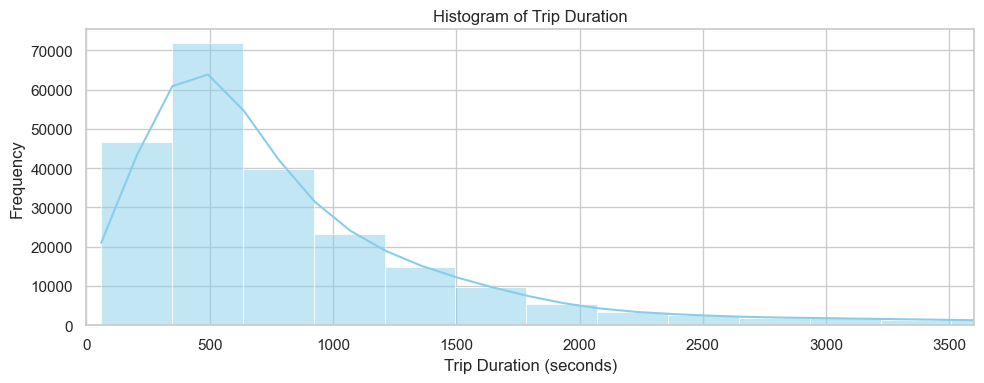

In [91]:
plt.figure(figsize=(10, 4))
sns.histplot(trip_durations, bins=100, kde=True, color='skyblue')

plt.title("Histogram of Trip Duration")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.xlim(0, 3600)  # Limit x-axis for better visibility (3600 seconds (~60 minutes))
plt.tight_layout()
plt.show()

#### Histogram of Trip Duration
he histogram shows that most trips are **short** (under 15 minutes), with a long tail of longer trips. This confirms a **right-skewed distribution**, which we also observed through the mean > median.

This information is valuable for operational planning—most users expect short rides, so rebalancing and charging stations should be optimized for frequent, short usage.


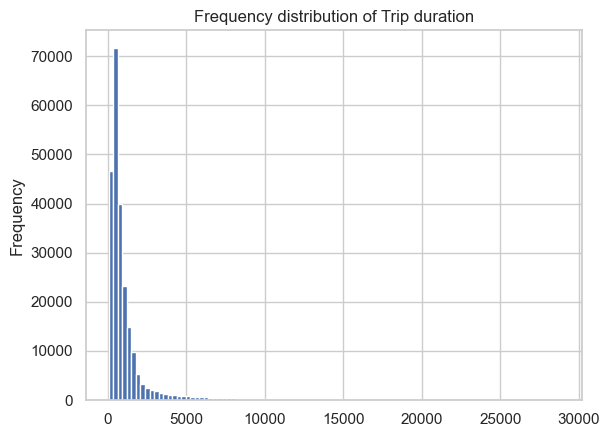

In [40]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

#### Listing 1-18. Plotting a Box plot of Trip Duration

Visualize the spread and outliers of trip durations using a box plot.

Why Use a Box Plot?
- Shows summary statistics:
  - Median (Q2)
  - Lower quartile (Q1)
  - Upper quartile (Q3)
  - Whiskers (min/max range excluding outliers)
  - Outliers (dots)
- Useful for comparing distributions or identifying abnormal trip durations.

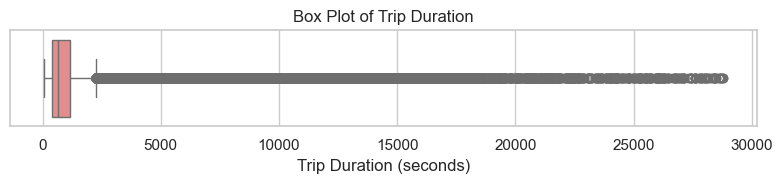

In [41]:
plt.figure(figsize=(8, 2))

# Use log scale for better visibility (due to outliers)
sns.boxplot(x=data['tripduration'], color='lightcoral')

plt.title("Box Plot of Trip Duration")
plt.xlabel("Trip Duration (seconds)")
#plt.xlim(0, 4000)  # Optional: Focus on reasonable range

plt.tight_layout()
plt.show()

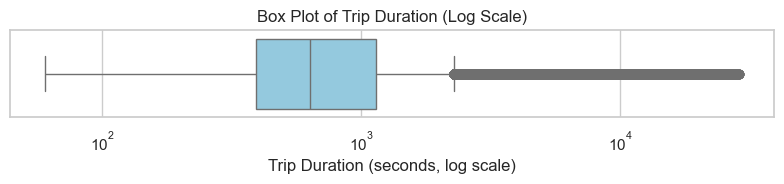

In [42]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=data['tripduration'], color='skyblue')
plt.xscale('log')
plt.title("Box Plot of Trip Duration (Log Scale)")
plt.xlabel("Trip Duration (seconds, log scale)")
plt.tight_layout()
plt.show()

The box plot shows that **most trip durations** lie within a narrow range, but there are **many high-value outliers**. These may include long leisure rides, forgotten returns, or system errors.

Using a log scale or truncating extreme values helps make the distribution more interpretable. This reinforces the earlier finding that the distribution is **right-skewed**.


#### Listing 1-19. Determining Ratio of Values in Observations of tripduration Which Are Outliers

Calculate how many tripduration values are statistical outliers using the Interquartile Range (IQR) method, and determine what percentage of the total data they represent.

Why?
- Helps quantify the amount of noise or abnormal behavior in your dataset.
- Outliers can affect:
     - Statistical summaries (mean, std) 
     - Model training (especially regress


IQR Outlier Formula:
Outliers are values:

tripduration > Q3+1.5×IQR or < Q1−1.5×IQR


Where:

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 - Q1

In [43]:

trip_durations = data['tripduration'].dropna()

Q1 = trip_durations.quantile(0.25)
Q3 = trip_durations.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = trip_durations[(trip_durations < lower_bound) | (trip_durations > upper_bound)]

outlier_ratio = len(outliers) / len(trip_durations) * 100

print(f" Number of outliers: {len(outliers)}")
print(f"Outliers represent {outlier_ratio:.2f}% of all trip records.")


 Number of outliers: 22540
Outliers represent 9.55% of all trip records.


 #### Listing 1-22 – Calculating Z-Scores for Observations in tripduration

 Calculate the z-score for each value in the `tripduration` column to identify how many standard deviations each observation is from the mean.

Why Use Z-Scores?
- Z-scores allow us to standardize data.
- Helps detect outliers:
    - |z| > 3 → considered extreme outliers

- Useful for:
    - Statistical testing
    - Anomaly detection
    - Preprocessing for ML models

In [44]:
from scipy.stats import zscore

In [45]:
trip_z_scores = zscore(trip_durations)

trip_z_scores = pd.Series(trip_z_scores, name="zscore")

zscore_df = pd.DataFrame({
    'tripduration': trip_durations,
    'zscore': trip_z_scores
})

zscore_df.head()

,tripduration,zscore
0,985.935,0.297573
1,926.375,0.158762
2,883.831,-0.329843
3,865.937,-0.385242
4,923.923,-0.552361


In [46]:
mean_trip_duration = np.mean([x for x in trip_durations if lower_bound <= x <= upper_bound])
print(f"Mean of non-outlier trip durations: {mean_trip_duration:.2f} seconds")

Mean of non-outlier trip durations: 711.73 seconds


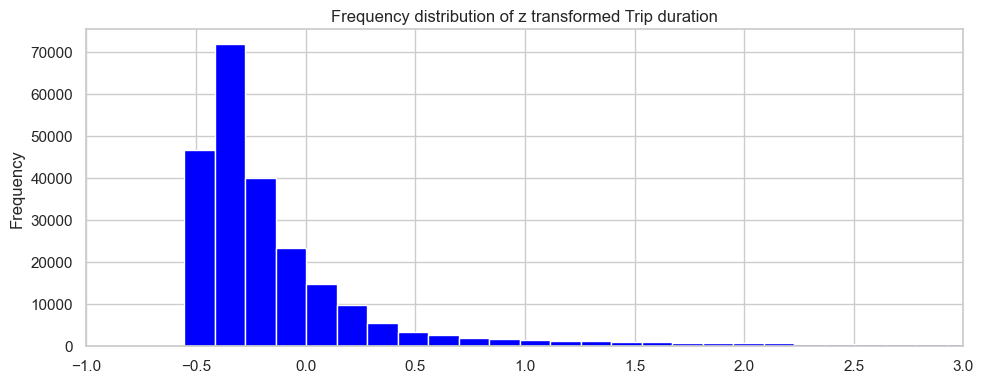

In [47]:
plt.figure(figsize=(10, 4))
zscore_df['zscore'].plot.hist(bins=100, title='Frequency distribution of z transformed Trip duration', color='blue')
plt.xlim(-1, 3)
plt.tight_layout()
plt.show()

 #### Listing 1-23 – Replace Outliers with the Calculated Mean

 Create a new column where:
 - Trip durations greater than the upper whisker are replaced with the mean of the non-outlier group.
 - Others remain the same.

In [71]:
def transform_tripduration(x):
    return mean_trip_duration if x > upper_bound else x


data['tripduration_mean'] = data['tripduration'].apply(transform_tripduration)
data['tripduration_mean'].sample(3) 

18104      188.880
101617     251.001
40718     1885.415
Name: tripduration_mean, dtype: float64

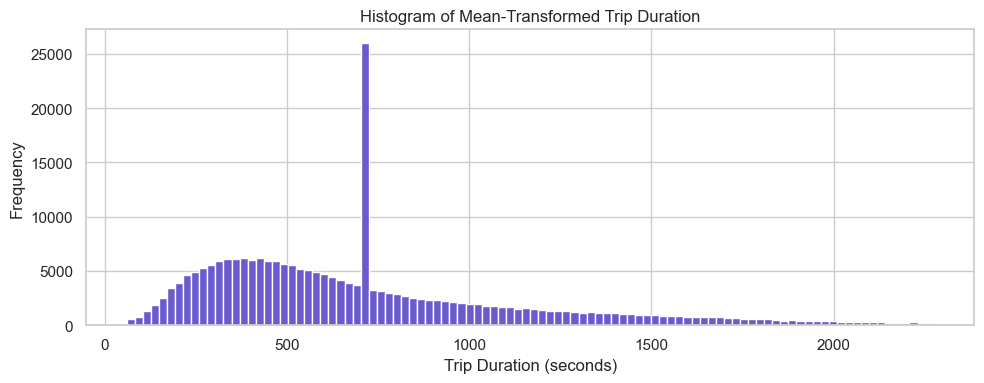

In [72]:
plt.figure(figsize=(10, 4))
data['tripduration_mean'].plot.hist(bins=100, title='Histogram of Mean-Transformed Trip Duration', color='slateblue')
plt.xlabel("Trip Duration (seconds)")
plt.tight_layout()
plt.show()

#### Outlier Treatment Using Mean Imputation (IQR Method)

Using the IQR method, we calculated a robust mean (≈711.73s) from non-outlier trip durations. We then replaced values above the upper whisker with this mean to reduce skewness and the impact of extreme values.

This approach helps prepare the data for algorithms that are sensitive to outliers, such as linear models and clustering.

### Listing 1-24. Deternining the Measures of Center in Absence of Outliers

Goal

Compute the mean, standard deviation, and median of the tripduration_mean column — which is your transformed dataset without high-end outliers.

 Why?
 - Helps compare how the central tendency and spread have changed after outlier handling.
 - Confirms that mean is now closer to median, showing reduced skewness.

In [80]:
mean_clean = data['tripduration_mean'].mean()
std_clean = data['tripduration_mean'].std()
median_clean = data['tripduration_mean'].median()
mode_clean = data['tripduration_mean'].mode()[0]

# Display results
print(f"Mean of trip duration: {mean_clean:.6f}")
print(f"Standard deviation of trip duration: {std_clean:.6f}")
print(f"Median of trip duration: {median_clean:.6f}")
print(f"Mode of trip duration: {mode_clean:.6f}")

Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000
Mode of trip duration: 711.726573


**Interpretation** 

- Mean ≈ 711s and median ≈ 633s → much closer than before → less skew.

- Standard deviation is also reduced → fewer extreme values pulling the mean apart.

 ### EXERCISES
1. Find the mean, median, and mode of the trip duration of gender type male.
2. by looking at the numbers obtained earlier, in your opinion is the distribution symmetric or skewed? if skewed, then is is it positively skewed or negatively skewed?
3. plot a frequency distribution of trip duration for trips availed by gender type male. does it validate your inference as you did so in the previous question?
4. plot a box plot of the trip duration of trips taken by males. do you think any outliers exist?
5. apply the formula in listing 1-6 to determine the percentage of observations for which outliers exists.
6. perform the treatment of outliers by incorporating one of the methods we discussed earlier for the treatment of outliers.

In [51]:
### Exercise 1

male_trips = data[data['gender'] == 'Male']['tripduration'].dropna()

male_mean = male_trips.mean()
male_median = male_trips.median()
male_mode = male_trips.mode().iloc[0]  # Mode can return multiple values

print(f"Mean: {male_mean:.2f} sec")
print(f"Median: {male_median:.2f} sec")
print(f"Mode: {male_mode:.2f} sec")

Mean: 563.40 sec
Median: 458.45 sec
Mode: 466.17 sec


**Exercise 2: Is the Distribution Symmetric or Skewed?**

## Inference

The distribution is **positively skewed** because:
- Mean > Median > Mode
- This indicates a long tail on the right (some unusually long trips).


**Exercise 3: Plot Frequency Distribution of Male Trip Durations**

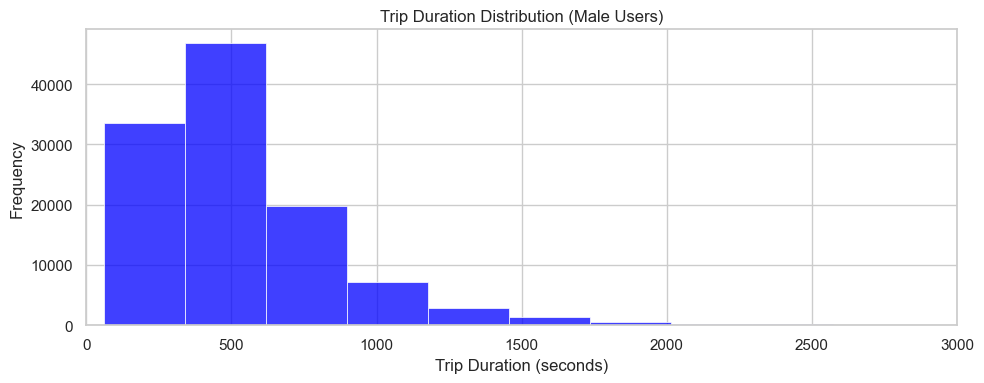

In [83]:
plt.figure(figsize=(10, 4))
sns.histplot(male_trips, bins=100, kde=False, color='blue')
plt.title("Trip Duration Distribution (Male Users)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.xlim(0, 3000)  # Truncate for clearer view
plt.tight_layout()
plt.show()

#### Insight

The histogram shows a clear **right-skewed distribution**, validating the earlier statistical inference. Most trips are short, with a few very long ones.


#### 4. plot a box plot of the trip duration of trips taken by males. do you think any outliers exist?

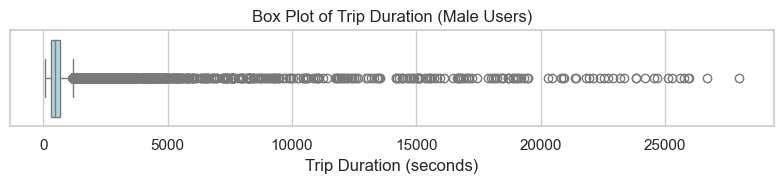

In [53]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=male_trips, color='lightblue')
plt.title("Box Plot of Trip Duration (Male Users)")
plt.xlabel("Trip Duration (seconds)")
# plt.xlim(0, 4000) 
plt.tight_layout()
plt.show()

**Insight**

The box plot clearly shows **outliers** on the higher end (right side), confirming the distribution is not symmetric and supports the earlier finding of positive skew.


5. apply the formula in listing 1-6 to determine the percentage of observations for which outliers exists.

In [54]:
q1 = male_trips.quantile(0.25)
q3 = male_trips.quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

# Find outliers
outliers = male_trips[(male_trips > upper_whisker) | (male_trips < lower_whisker)]
outlier_percentage = len(outliers) / len(male_trips) * 100
print("number of Outliers: ",len(outliers))
print(f"Percentage of Outliers exist in {outlier_percentage:.2f}% of male trip records.")

number of Outliers:  5681
Percentage of Outliers exist in 5.03% of male trip records.



6. perform the treatment of outliers by incorporating one of the methods we discussed earlier for the treatment of outliers.

In [75]:
mean_no_outliers = male_trips[(male_trips <= upper_whisker)].mean()

def impute_upper_outliers(x):
    return mean_no_outliers if x > upper_whisker else x

data['male_tripduration_imputed'] = data.apply(
    lambda row: impute_upper_outliers(row['tripduration']) if row['gender'] == 'Male' else row['tripduration'],
    axis=1
)

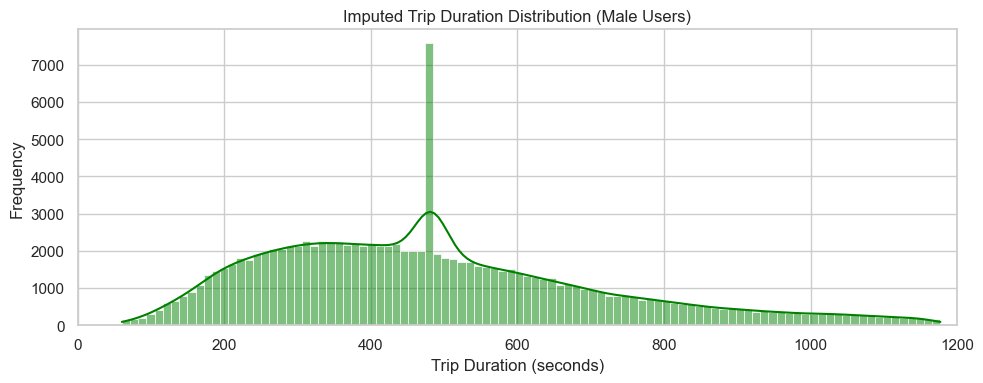

In [81]:
plt.figure(figsize=(10, 4))
sns.histplot(data[data['gender'] == 'Male']['male_tripduration_imputed'], bins=100, color='green',kde=True)
plt.title("Imputed Trip Duration Distribution (Male Users)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.xlim(0, 1200)
plt.tight_layout()
plt.show()

**Outlier Treatment for Male Users**

Outliers above the upper whisker (~1.5×IQR) were replaced with the non-outlier mean. This reduced right skewness and made the distribution more centered and stable — ideal for statistical modeling and prediction.


## Correlation
Correlation is a statistical measure that describes how two variables move in relation to each other.

It tells us:

- **Direction:** Positive or negative relationship

- **Strength:** Weak, moderate, or strong

- **Form:** Typically linear (in basic correlation)

**Common Correlation Coefficients:**
| Type                | Measures            | Range    | Best For                   |
| ------------------- | ------------------- | -------- | -------------------------- |
| **Pearson**         | Linear relationship | -1 to +1 | Numerical data             |
| **Spearman** (Rank) | Monotonic relation  | -1 to +1 | Ranked/ordinal data        |
| **Kendall Tau**     | Ordinal association | -1 to +1 | Small datasets, tied ranks |

- Most commonly used: **Pearson Correlation Coefficient.**

- r ∈ [−1,1]
     - r>0: Positive correlation (e.g., height & weight)
     - r<0: Negative correlation (e.g., age & tech usage)
     - r=0: No linear correlation


#### Listing 1-25. Pairplot of trip duration and age

Create a pairplot to visually explore the relationship between:

- Trip Duration
- Age (calculated from birth year)

This allows us to detect patterns, clusters, or correlations visually between these variables.



In [57]:

print (data['starttime_year'].head())

212893    2016
117423    2015
116857    2015
116828    2015
179564    2016
Name: starttime_year, dtype: int32


In [58]:
data['age'] = data['starttime_year'] - data['birthyear']
print(data[['age','starttime_year','birthyear']].sample(5))

         age  starttime_year  birthyear
159148  28.0            2015     1987.0
225376  33.0            2016     1983.0
73148    NaN            2015        NaN
130728  28.0            2015     1987.0
16382    NaN            2014        NaN


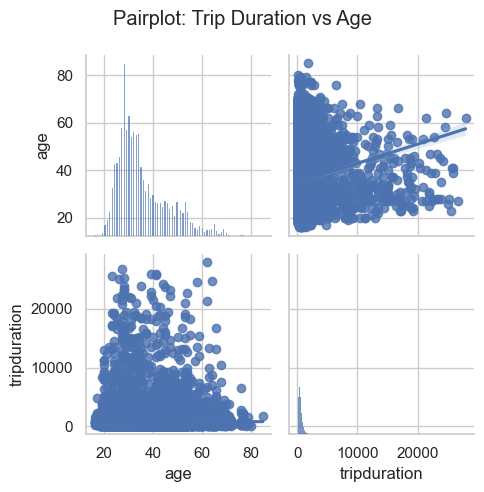

In [59]:
data1 = data.dropna()
sns.pairplot(data1, vars=['age', 'tripduration'] , kind='reg')

plt.suptitle("Pairplot: Trip Duration vs Age")
plt.tight_layout()
plt.show()

In [60]:

cleaned = data[(data['age'] >= 10) & (data['age'] <= 90)].copy()

print(cleaned[['age','starttime_year','birthyear']].sample(5))

         age  starttime_year  birthyear
65494   28.0            2015     1987.0
108150  27.0            2015     1988.0
139370  37.0            2015     1978.0
17514   42.0            2014     1972.0
185112  34.0            2016     1982.0


In [61]:
cleaned['log_tripduration'] = np.log1p(cleaned['tripduration'])
print(cleaned[['age','starttime_year','birthyear','log_tripduration','tripduration']].sample(5))

         age  starttime_year  birthyear  log_tripduration  tripduration
114565  33.0            2015     1982.0          5.447857       231.260
27107   39.0            2015     1976.0          6.634382       759.809
63853   31.0            2015     1984.0          5.772154       320.229
96379   33.0            2015     1982.0          5.616051       273.802
173837  32.0            2016     1984.0          6.565997       709.520


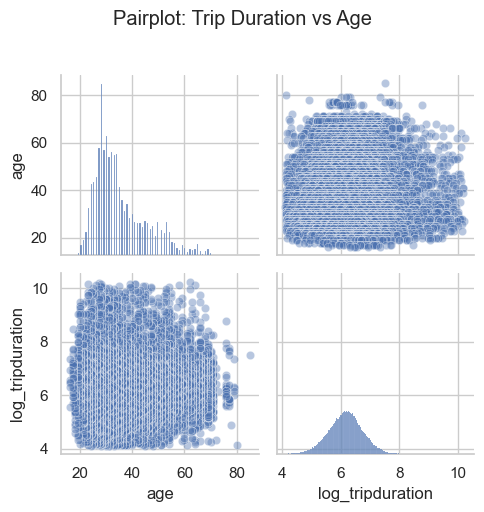

In [62]:
sns.pairplot(cleaned, vars=['age', 'log_tripduration'], kind='scatter', plot_kws={'alpha': 0.4})

plt.suptitle("Pairplot: Trip Duration vs Age", y=1.02)
plt.tight_layout()
plt.show()

#### Pairplot of Trip Duration and Age

The pairplot shows a **slight negative relationship** between age and trip duration: younger users tend to take longer trips on average. However, the correlation is weak and noisy, suggesting other factors (e.g., user type) may be stronger predictors.

The log transformation of trip duration helped reveal structure that was otherwise masked by outliers.


#### Listing 1-26. Correlation Coefficient Between trip duration and age

Calculate the Pearson correlation coefficient between:

- `tripduration`

- `age` (derived from birthyear)

To see whether older or younger users tend to take longer trips.

In [63]:
cor_matrix = cleaned[['age','log_tripduration']].corr()

# Display matrix
print(cor_matrix)

                       age  log_tripduration
age               1.000000          0.109349
log_tripduration  0.109349          1.000000


The correlation coefficient came out to be greater than 0 which is a positive correlation, but being much less than 1 meant it to be weak in nature.

In [64]:
correlation = cleaned['tripduration'].corr(cleaned['age'])

print(f" Correlation between trip duration and age: {correlation:.4f}")

 Correlation between trip duration and age: 0.0581


#### Interpretation
A negative correlation (e.g., ~ -0.058) means:

- Older users tend to take slightly longer trips.

- But since it's weak, age is not a strong predictor of trip duration.

#### Correlation Between Trip Duration and Age

The Pearson correlation between `tripduration` and `age` is approximately **-0.0581**, indicating a **weak negative relationship**. This suggests that as users get older, they tend to take slightly longer trips on average — but the effect is not strong.

This insight can be considered in further persona modeling or when deciding user engagement strategies for different age groups.

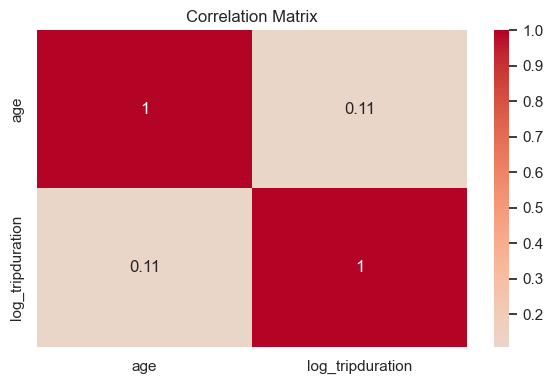

In [65]:
plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Hypothesis Testing

Hypothesis testing is a structured method to decide whether the effect you see in data is real or just due to random chance.

| Step                                      | Explanation                                                        |
| ----------------------------------------- | ------------------------------------------------------------------ |
| **1. Define Null Hypothesis (H₀)**        | Default belief (e.g., no difference between groups)                |
| **2. Define Alternative Hypothesis (H₁)** | The opposite of H₀ (e.g., groups are different)                    |
| **3. Choose Significance Level (α)**      | Common: 0.05 (5% chance of false positive)                         |
| **4. Choose a Test**                      | e.g., t-test, z-test depending on data                             |
| **5. Calculate Test Statistic**           | Quantifies how different your groups are                           |
| **6. Compute P-value**                    | Probability of getting your result (or more extreme) if H₀ is true |
| **7. Decision**                           | If p-value < α → reject H₀. Otherwise, fail to reject H₀.          |



Hypothesis testing is a statistical method used to make decisions or inferences about a population based on a sample.

It's like asking:

"Is this observed difference real, or could it have happened by random chance?"

In [66]:
from scipy.stats import ttest_ind

# Trip durations by gender
male_durations = data[data['gender'] == 'Male']['tripduration'].dropna()
female_durations = data[data['gender'] == 'Female']['tripduration'].dropna()

# Perform t-test
t_stat, p_val = ttest_ind(male_durations, female_durations, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

T-statistic: -27.031
P-value: 0.00000


#### Step 24: Listing 1-27 – Daily-Level Two-Tailed T-Test for Gender and User Type

Goal
Perform pairwise t-tests across categories of:
- Gender (Female, Male, Other)
- User Type (Member vs Short-Term Pass Holder)
…based on daily trip counts.

What’s Different in This Listing?
Unlike previous t-tests (based on trip duration), this test:
- Groups trips by day and category (e.g., how many male trips per day)
- Then compares daily usage counts between categories using independent t-tests


In [67]:
for cat in ['gender', 'usertype']:
    print(f"\n📂 Category: {cat}")

    # Daily trip counts per category (pivoted)
    counts = data.groupby(['starttime_date', cat]).size().unstack()
    counts = counts.dropna()

    # Pairwise comparisons
    for i, col1 in enumerate(counts.columns):
        for col2 in counts.columns[i+1:]:
            stat, pval = ttest_ind(counts[col1], counts[col2], equal_var=False)
            print(f"{col1} vs {col2}: T={stat:.4f}, P={pval:.6f}")


📂 Category: gender
Female vs Male: T=-38.5722, P=0.000000
Female vs Other: T=48.2487, P=0.000000
Male vs Other: T=53.1803, P=0.000000

📂 Category: usertype
Member vs Short-Term Pass Holder: T=14.3935, P=0.000000


P-value: Probability of getting your result (or more extreme) if H₀ is true

the p-values in the output seem to be roughly 0. If we go with a confidence interval of 95%, then it translates to a p-value of 0.05. 

**Interpretation:**
| Comparison                | Result                     | Conclusion                                   |
| ------------------------- | -------------------------- | -------------------------------------------- |
| Female vs Male            | p < 0.05 → **Significant** | Males take more trips per day than females   |
| Female vs Other           | p < 0.05 → **Significant** | 'Other' category differs significantly       |
| Male vs Other             | p < 0.05 → **Significant** | Again, likely due to very few 'Other' values |
| Member vs Short-Term Pass | p < 0.05 → **Significant** | Members ride more frequently per day         |



We compared **daily trip frequencies** across categories using two-sample t-tests:

- **Gender**
  - Male vs Female: Significant difference in average daily usage.
  - Male vs Other / Female vs Other: Very significant, but 'Other' likely has few records.

- **User Type**
  - Members take significantly more trips per day than Short-Term Pass Holders.

These results statistically confirm behavioral patterns observed earlier in EDA, justifying user segmentation by type and gender in further modeling.

This leads us to the conclusion that we need to treat all of these categories separately when moving in the modeling aspect, as all of them have different variances.

### What is the Central Limit Theorem (CLT)?
The Central Limit Theorem is one of the most important concepts in statistics and data science. It states:

If you take many random samples from any population (with a defined mean and standard deviation), the distribution of the sample means will approach a normal distribution as the sample size increases — regardless of the population's original distribution.

**Key Assumptions:**
- The original distribution must have a finite mean (μ) and finite standard deviation (σ).
- Sample size n should be sufficiently large.
- Samples must be independent and identically distributed (i.i.d.).


**Visual Breakdown of CLT**

Let’s say the population distribution is skewed (not normal):
-  Step 1: Take 1 sample of size 5 → calculate its mean
-  Step 2: Repeat 1,000 times → get 1,000 means
-  Step 3: Plot a histogram of these 1,000 sample means

You’ll get a bell-shaped curve (normal distribution) — even though the original data was skewed!

#### Listing 1-28. Script to Validate Central Limit Theorem on Trips Dataset

Show that as we increase the sample size of daily trip counts, their distribution increasingly resembles a normal distribution — even though the original data may be skewed.



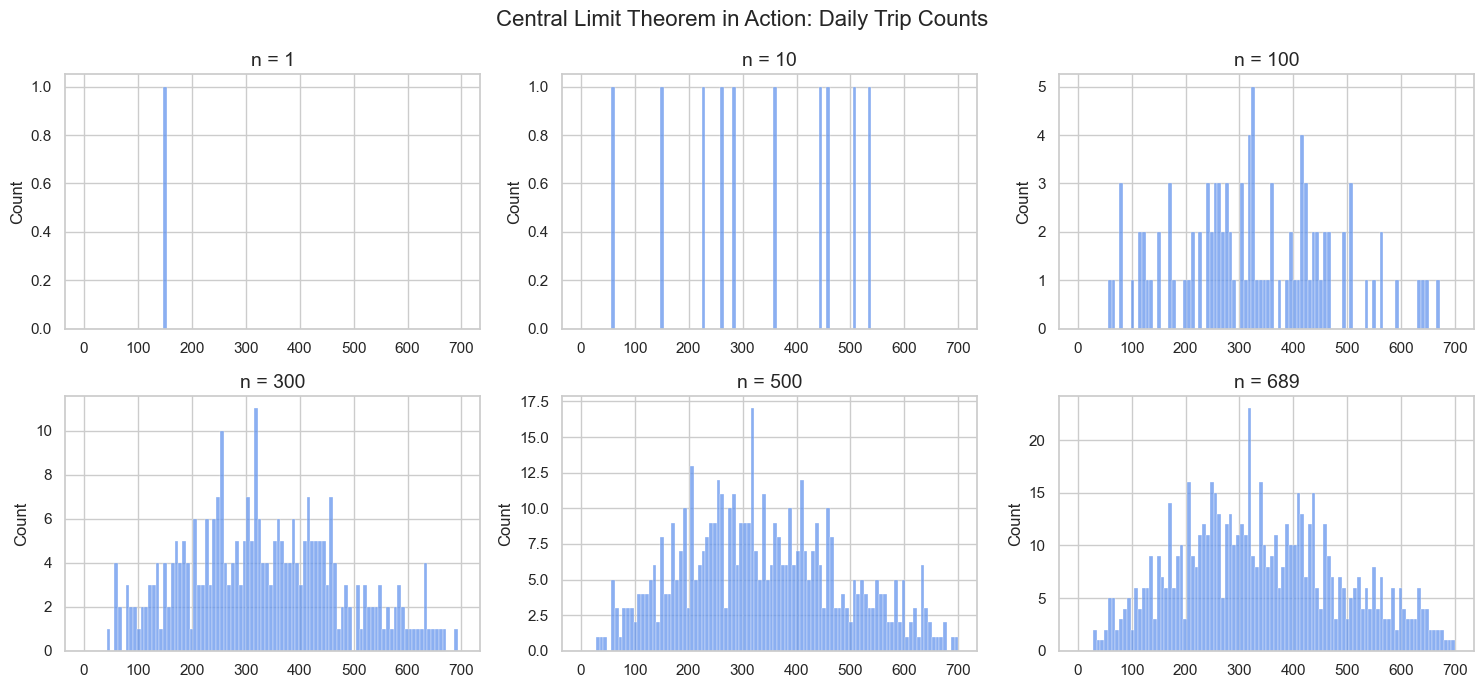

In [90]:
daily_tickets = list(data.groupby('starttime_date').size())

sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]  # Plot after these many samples
plot_count = 1
random.shuffle(daily_tickets)

plt.figure(figsize=(15, 7))
binrange = np.linspace(0, 700, 101)


for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())
    
    if (i + 1) in checkpoints or not daily_tickets:
        plt.subplot(2, 3, plot_count)
        sns.histplot(sample_tickets, bins=binrange, color='cornflowerblue')
        plt.title(f'n = {i + 1}', fontsize=14)
        plot_count += 1

    if not daily_tickets:
        break

plt.suptitle("Central Limit Theorem in Action: Daily Trip Counts", fontsize=16)
plt.tight_layout()
plt.show()

**What This Shows**

Each subplot shows the histogram of sample means for growing values of n.
As n increases from 1 → 1000:

✅ You will see the distribution:
- Starts irregular / skewed
- Becomes smoother
- Converges toward a bell shape
  
This experiment validates the Central Limit Theorem (CLT). We used daily trip counts from the dataset and plotted histograms of increasing sample sizes.

As the number of samples grew, the distribution of these values approached a **normal (Gaussian) distribution**, despite the underlying data being potentially skewed.

This confirms that the CLT holds true for real-world, non-normal data — a fundamental assumption used in statistical inference and modeling.

**----------------------------------------------------------------**

## What Is Hypothesis Testing?
**📘 Simple Definition:**

Hypothesis testing is a structured method to decide whether the effect you see in data is real or just due to random chance.